In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [45]:
df = pd.read_csv('/home/salvo/PycharmProjects/DMML_project/Dataset/Autism_Data.arff', na_values ='?',quotechar= "'")

In [46]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,NaN,no,no,Russia,no,7,18 and more,NaN,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


In [47]:
df = df.rename(columns={'austim':'family member with PDD','jundice':'jaundice','contry_of_res':'country_of_res'})

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A1_Score                704 non-null    int64  
 1   A2_Score                704 non-null    int64  
 2   A3_Score                704 non-null    int64  
 3   A4_Score                704 non-null    int64  
 4   A5_Score                704 non-null    int64  
 5   A6_Score                704 non-null    int64  
 6   A7_Score                704 non-null    int64  
 7   A8_Score                704 non-null    int64  
 8   A9_Score                704 non-null    int64  
 9   A10_Score               704 non-null    int64  
 10  age                     702 non-null    float64
 11  gender                  704 non-null    object 
 12  ethnicity               609 non-null    object 
 13  jaundice                704 non-null    object 
 14  family member with PDD  704 non-null    ob

In [49]:
#We drop used_app_before cause it is a useless attribute and it is not related to a patient medical or biological condition
df.drop('used_app_before',axis=1,inplace=True)

In [50]:
#Count nan values
df.isnull().sum()

A1_Score                   0
A2_Score                   0
A3_Score                   0
A4_Score                   0
A5_Score                   0
A6_Score                   0
A7_Score                   0
A8_Score                   0
A9_Score                   0
A10_Score                  0
age                        2
gender                     0
ethnicity                 95
jaundice                   0
family member with PDD     0
country_of_res             0
result                     0
age_desc                   0
relation                  95
Class/ASD                  0
dtype: int64

In [51]:
df.ethnicity.value_counts()

White-European     233
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: ethnicity, dtype: int64

In [52]:
#we can modify also the one row with value of ethnicity = others to 'Others'
df[df['ethnicity']=='others'] 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,result,age_desc,relation,Class/ASD
657,1,1,0,0,1,0,1,0,1,0,36.0,m,others,no,no,United States,5,18 and more,Self,NO


In [53]:
df.loc[657,'ethnicity'] = 'Others'
df[df['ethnicity']=='others']

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,result,age_desc,relation,Class/ASD


In [54]:
#the Desc age value is useless so we can eliminate it
df.age_desc.value_counts()

18 and more    704
Name: age_desc, dtype: int64

In [55]:
df.drop('age_desc', axis=1, inplace=True)

In [56]:
#Need to drop also the relation column because it is not related to the patient caratheristics
df.drop('relation',axis=1,inplace=True)

In [57]:
#Need to drop the result column as it is the result of the sum o the precedent score
df.drop(axis =1, inplace= True,labels='result')

_Now we analyze the age which is a float value. We can see that there is an anomalous age which is 383 --> we need to drop that patient_

In [58]:
df.age.value_counts().sort_index()

17.0     18
18.0     31
19.0     35
20.0     46
21.0     49
22.0     37
23.0     37
24.0     34
25.0     27
26.0     28
27.0     31
28.0     24
29.0     27
30.0     30
31.0     21
32.0     18
33.0     16
34.0     12
35.0     17
36.0     13
37.0     17
38.0     12
39.0      7
40.0     16
41.0      3
42.0     15
43.0     11
44.0     10
45.0      4
46.0      6
47.0      8
48.0      4
49.0      3
50.0      5
51.0      1
52.0      5
53.0      6
54.0      2
55.0      6
56.0      2
58.0      2
59.0      1
60.0      1
61.0      2
64.0      1
383.0     1
Name: age, dtype: int64

In [59]:
df[df.age == 383.0]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,383.0,f,Pasifika,no,no,New Zealand,NO


In [60]:
df.drop(52,axis=0,inplace = True)

In [61]:
df['gender'] = df['gender'].map({'m':1,'f':0})
df['jaundice'] = df['jaundice'].map({'yes':1,'no':0})
df['family member with PDD'] = df['family member with PDD'].map({'yes':1,'no':0})
df['Class/ASD'] = df['Class/ASD'].map({'YES':1,'NO':0})

## Handling of missing values

Ignoring the tuple with missing values to see if there is a change in class distribution

In [62]:
#Calculate the percentage of remained tuple 
df_notna = df.dropna(how='any')
len(df_notna)/len(df)

0.8648648648648649

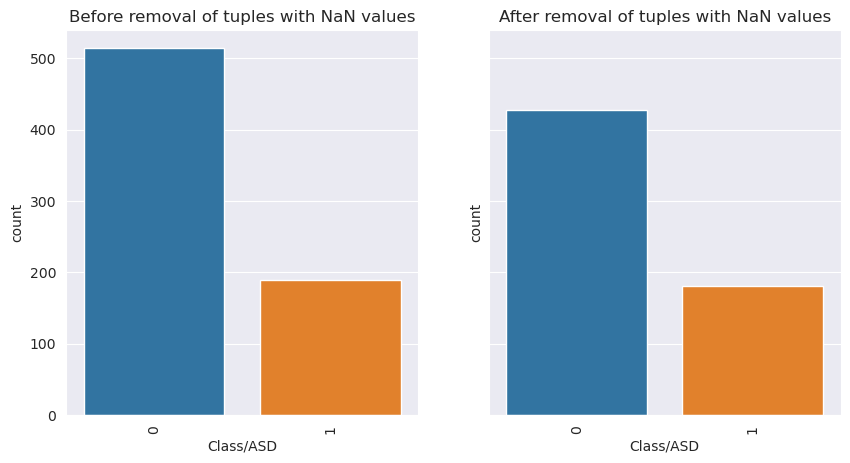

In [63]:
#Plot the count plot for the class in the original dataframe and in dataframe without missing values
fig,axes = plt.subplots(1,2,figsize=(10,5),sharey = True)
sns.countplot(x='Class/ASD',data = df, ax = axes[0], order = df_notna['Class/ASD'].value_counts().index)
axes[0].tick_params(axis = 'x',labelrotation=90)
axes[0].set_title('Before removal of tuples with NaN values')
sns.countplot(x='Class/ASD',data = df_notna, ax = axes[1], order = df_notna['Class/ASD'].value_counts().index)
axes[1].tick_params(axis = 'x',labelrotation=90)
axes[1].set_title('After removal of tuples with NaN values')

plt.show()

In [64]:
#Check for each attribute with missing values the number of rows that contain Nan values
rows_na =  df.isnull().any(axis=1)
print(df.loc[[i for i in rows_na.index if rows_na[i]]].ethnicity.value_counts(dropna= False))
print()


NaN    95
Name: ethnicity, dtype: int64



In [65]:
print(df.loc[[i for i in rows_na.index if rows_na[i]]].age.value_counts(dropna= False))


21.0    17
20.0    15
19.0    11
22.0     4
23.0     4
32.0     4
17.0     4
26.0     3
24.0     3
30.0     3
28.0     2
47.0     2
37.0     2
27.0     2
31.0     2
NaN      2
43.0     2
52.0     2
50.0     1
33.0     1
44.0     1
40.0     1
41.0     1
29.0     1
25.0     1
45.0     1
38.0     1
34.0     1
56.0     1
Name: age, dtype: int64


In [66]:
#Find the rows where age  is null
mask = df['age'].isnull()
df[mask]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,Class/ASD
62,0,0,0,0,0,0,0,0,0,0,NaN,1,NaN,0,0,Saudi Arabia,0
91,0,1,0,0,1,0,1,0,0,1,NaN,0,NaN,0,0,Jordan,0


In [67]:
#drop them
df.drop(62,axis=0,inplace = True)
df.drop(91,axis=0,inplace = True)

In [68]:
#fill the other missing values with Others
df.fillna(value = 'Others',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 703
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A1_Score                701 non-null    int64  
 1   A2_Score                701 non-null    int64  
 2   A3_Score                701 non-null    int64  
 3   A4_Score                701 non-null    int64  
 4   A5_Score                701 non-null    int64  
 5   A6_Score                701 non-null    int64  
 6   A7_Score                701 non-null    int64  
 7   A8_Score                701 non-null    int64  
 8   A9_Score                701 non-null    int64  
 9   A10_Score               701 non-null    int64  
 10  age                     701 non-null    float64
 11  gender                  701 non-null    int64  
 12  ethnicity               701 non-null    object 
 13  jaundice                701 non-null    int64  
 14  family member with PDD  701 non-null    in

# Convert attribute type

In [69]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'family member with PDD', 'country_of_res',
       'Class/ASD'],
      dtype='object')

In [70]:
for column in df.columns:
    if column in ["ethnicity","country_of_res"]:
        temp = pd.get_dummies(df[column],drop_first=False)
        df = pd.concat([df,temp],axis=1)
        df.drop(axis = 1, labels = column,inplace = True)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Sri Lanka,Sweden,Tonga,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Viet Nam
0,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
700,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
701,1,0,1,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
702,1,0,0,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#Change every nominal attribute type as category
df['age'] = df['age'].astype('float32')
for column in df.columns:
    if column not in df.columns[1:10] and not (column=='age') :
        df[column] = df[column].astype('category')

df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'family member with PDD', 'Class/ASD', 'Asian', 'Black',
       'Hispanic', 'Latino', 'Middle Eastern ', 'Others', 'Pasifika',
       'South Asian', 'Turkish', 'White-European', 'Afghanistan',
       'AmericanSamoa', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belgium', 'Bolivia',
       'Brazil', 'Burundi', 'Canada', 'Chile', 'China', 'Costa Rica', 'Cyprus',
       'Czech Republic', 'Ecuador', 'Egypt', 'Ethiopia', 'Finland', 'France',
       'Germany', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Lebanon',
       'Malaysia', 'Mexico', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Oman', 'Pakistan', 'Philippines', 'Portugal',
       'Romania', 'Russi

In [72]:
df_notna

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,White-European,0,0,United States,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,Latino,0,1,Brazil,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,Latino,1,1,Spain,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,White-European,0,1,United States,0
5,1,1,1,1,1,0,1,1,1,1,36.0,1,Others,1,0,United States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,1,1,1,1,1,1,1,1,1,27.0,0,Pasifika,0,0,Australia,1
699,0,1,0,1,1,0,1,1,1,1,25.0,0,White-European,0,0,Russia,1
700,1,0,0,0,0,0,0,1,0,1,34.0,1,Hispanic,0,0,Mexico,0
702,1,0,0,1,1,0,1,0,1,1,35.0,1,South Asian,0,0,Pakistan,0


In [73]:
for column in df_notna.columns:
    if column in ["ethnicity","country_of_res"]:
        temp = pd.get_dummies(df_notna[column],drop_first=False)
        df_notna = pd.concat([df_notna,temp],axis=1)
        df_notna.drop(axis = 1, labels = column,inplace = True)
df_notna

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Sri Lanka,Sweden,Tonga,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Viet Nam
0,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
5,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
699,0,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
700,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
702,1,0,0,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#Change every nominal attribute type as category
df_notna['age'] = df_notna['age'].astype('float32')
for column in df_notna.columns:
    if column not in df_notna.columns[1:10] and not (column=='age') :
        df_notna[column] = df_notna[column].astype('category')

df_notna.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'family member with PDD', 'Class/ASD', 'Asian', 'Black',
       'Hispanic', 'Latino', 'Middle Eastern ', 'Others', 'Pasifika',
       'South Asian', 'Turkish', 'White-European', 'Afghanistan',
       'AmericanSamoa', 'Angola', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Bahamas', 'Bangladesh', 'Belgium', 'Bolivia', 'Brazil', 'Burundi',
       'Canada', 'Chile', 'China', 'Costa Rica', 'Cyprus', 'Czech Republic',
       'Ecuador', 'Egypt', 'Ethiopia', 'Finland', 'France', 'Germany',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Italy', 'Jordan',
       'Malaysia', 'Mexico', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Oman', 'Pakistan', 'Philippines', 'Portugal',
       'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Sierra Leone',
       'South Africa', 'Spain', 'Sri Lanka'

# Imbalanced class problems

In [75]:
df['Class/ASD'].value_counts()

0    512
1    189
Name: Class/ASD, dtype: int64

Class are not so imbalanced

In [76]:
df_notna['Class/ASD'].value_counts()

0    428
1    180
Name: Class/ASD, dtype: int64

Class are not so imbalanced. We have removed al lot of Non autistic patient with respect to autistic patient, so we balanced a little bit the classes

# Extract both dataframe

In [77]:
df_notna.to_csv("Dataset/preprocessed_notna_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/preprocessed_notna_dataset.csv'

In [ ]:
df.to_csv("Dataset/preprocessed_dataset.csv")